In [1]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [9]:
v_df = pd.read_csv('voy1_ephemeris_p1.txt', skiprows = 55, skipfooter=1147-1092, engine='python') # df of info about voyager's position
s_df = pd.DataFrame(columns = ['source_id', 'g_abs', 'bp_rp', 'parallax']) # df of info about stars

print(v_df)

                    date na1 na2         ra       dec  Unnamed: 5
0      1977-Sep-06 00:00           65.45370  25.53700         NaN
1      1977-Sep-16 00:00           66.76777  25.78933         NaN
2      1977-Sep-26 00:00           65.96444  25.65060         NaN
3      1977-Oct-06 00:00           64.31556  25.34236         NaN
4      1977-Oct-16 00:00           61.75803  24.80495         NaN
...                  ...  ..  ..        ...       ...         ...
1030   2005-Nov-18 00:00          255.79088  11.82527         NaN
1031   2005-Nov-28 00:00          255.89725  11.80246         NaN
1032   2005-Dec-08 00:00          256.00691  11.78925         NaN
1033   2005-Dec-18 00:00          256.11668  11.78606         NaN
1034   2005-Dec-28 00:00          256.22355  11.79296         NaN

[1035 rows x 6 columns]


In [12]:
for i in range(len(v_df.index)):
    #query to cone search around given voyager's position
    query = """SELECT source_id, ra, dec, phot_g_mean_mag+5*log10(parallax/1000)+5 AS g_abs, (phot_bp_mean_mag - phot_rp_mean_mag) AS bp_rp, parallax, 1000/parallax AS dist
    FROM external.gaiaedr3_gcns_main_1
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v_df['ra'][i]) + """,""" + str(v_df['dec'][i]) + """, 0.064))
    AND parallax > 0
    """
    
    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    s_df = pd.concat([s_df, results], ignore_index = True)
    
s_df1 = s_df.drop_duplicates(subset=['source_id']) #only keep unique rows
print(s_df1)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [13]:
s_df1.to_csv('voy1_stars_p1.csv')
print(s_df1)

               source_id      g_abs     bp_rp   parallax          ra  \
0     149730638774998016   8.838866  2.231787  12.107674   65.977215   
2      61129964583685760  12.583471  3.458733  10.772849   50.317099   
3      58351739218116736   7.272905  1.550478  14.835154   52.594261   
4     145226970426193280  11.006050  3.225406  20.723091   68.805377   
5     145227760700173568   5.432685  0.946136  22.218586   68.821736   
..                   ...        ...       ...        ...         ...   
98   4448327457017514368  12.015489  2.982508  11.549775  254.945989   
102  4544204042031997696  12.812216  3.365629  10.132921  255.586574   
103  4544204046325901184   4.468217  0.750638  10.282347  255.589114   
106  4448119855478628352  12.680576  3.298151  14.382125  255.094486   
108  4448094699855219328  13.604464  3.578892   9.638159  255.083258   

           dec        dist  
0    25.620079   82.592249  
2    20.753924   92.825955  
3    20.811438   67.407459  
4    22.988809   48

In [14]:
v2_df = pd.read_csv('voy1_ephemeris_p2.txt', skiprows = 55, skipfooter=212-157, engine='python') # df of info about voyager's position after 10000 days
s2_df = pd.DataFrame(columns = ['source_id', 'g_abs', 'bp_rp', 'parallax']) # df of info about stars encountered after 10000 days

print(v2_df)

                  date na1 na2         ra       dec  Unnamed: 5
0    2006-Jan-01 00:00          256.26481  11.79854         NaN
1    2006-Apr-01 00:00          256.63917  12.21235         NaN
2    2006-Jul-01 00:00          255.93466  12.45279         NaN
3    2006-Oct-01 00:00          255.67343  12.05224         NaN
4    2007-Jan-01 00:00          256.49260  11.81825         NaN
..                 ...  ..  ..        ...       ...         ...
95   2029-Oct-01 00:00          258.88496  12.19363         NaN
96   2030-Jan-01 00:00          259.31512  12.05861         NaN
97   2030-Apr-01 00:00          259.52212  12.27745         NaN
98   2030-Jul-01 00:00          259.13940  12.41087         NaN
99   2030-Oct-01 00:00          258.96052  12.19711         NaN

[100 rows x 6 columns]


In [16]:
for i in range(len(v2_df.index)):
    #query to cone search around given voyager's position after 10000 days
    query = """SELECT source_id, ra, dec, phot_g_mean_mag+5*log10(parallax/1000)+5 AS g_abs, (phot_bp_mean_mag - phot_rp_mean_mag) AS bp_rp, parallax, 1000/parallax AS dist
    FROM external.gaiaedr3_gcns_main_1
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v2_df['ra'][i]) + """,""" + str(v2_df['dec'][i]) + """, 0.064))
    AND parallax > 0
    """
    
    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    s2_df = pd.concat([s2_df, results], ignore_index = True) #database of stars encountered after 10000 days
    
s2_df = s2_df.drop_duplicates(subset=['source_id']) #only keep unique rows

print(s2_df)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [17]:
voy1_stars = s_df1.append(s2_df, sort = False)
voy1_stars = voy1_stars.drop_duplicates(subset=['source_id']) #only keep unique rows

print(voy1_stars)
voy1_stars.to_csv('voy1_stars.csv')

              source_id      g_abs     bp_rp   parallax          ra  \
0    149730638774998016   8.838866  2.231787  12.107674   65.977215   
2     61129964583685760  12.583471  3.458733  10.772849   50.317099   
3     58351739218116736   7.272905  1.550478  14.835154   52.594261   
4    145226970426193280  11.006050  3.225406  20.723091   68.805377   
5    145227760700173568   5.432685  0.946136  22.218586   68.821736   
..                  ...        ...       ...        ...         ...   
11  4541326345220772864  14.557653  0.959881  17.998234  258.906474   
12  4540956123337912704   7.071320  1.327833  21.820173  258.224451   
13  4540960383944257536  16.678106  3.363358  26.313612  258.452467   
15  4541320233485245184  11.333600  2.898572  10.902885  258.886321   
17  4541355069963293312  13.474532  3.743107  10.386750  259.188804   

          dec       dist  
0   25.620079  82.592249  
2   20.753924  92.825955  
3   20.811438  67.407459  
4   22.988809  48.255349  
5   23.04488

<ipython-input-2-2deca2d2d52c>:11: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


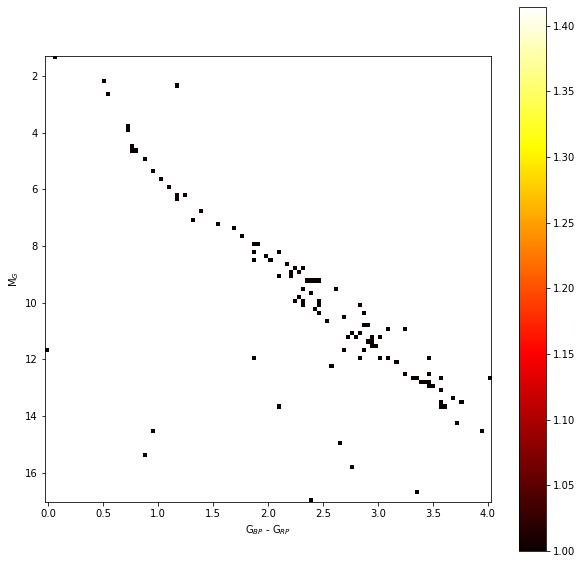

In [2]:
#build hr diagram
voy1_stars = pd.read_csv('voy1_stars.csv') #get csv

histogram, xedges, yedges = np.histogram2d(
   voy1_stars['bp_rp'], voy1_stars['g_abs'], bins=110)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

#plotting

plt.figure(figsize=(10, 10))

#plt.savefig('gaia_100_parsecs.png')
plt.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2])
    )

plt.colorbar()
#plt.title("Color Magnitude Diagram for Stars Encountered by Voyager 1 Transmissions")
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.savefig('voy1_stars_hr.png')

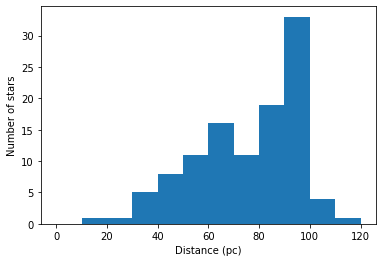

In [3]:
voy1_stars = pd.read_csv('voy1_stars.csv') #get csv

plt.hist(abs(1000/voy1_stars['parallax']), bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]) #plot parallax (mas) converted to distance (pc) in histogram

#plt.title("Distances of Stars Encountered by Voyager 1 Transmissions") #labels
plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")

plt.savefig("voy1_stars_dist.png")
plt.show()

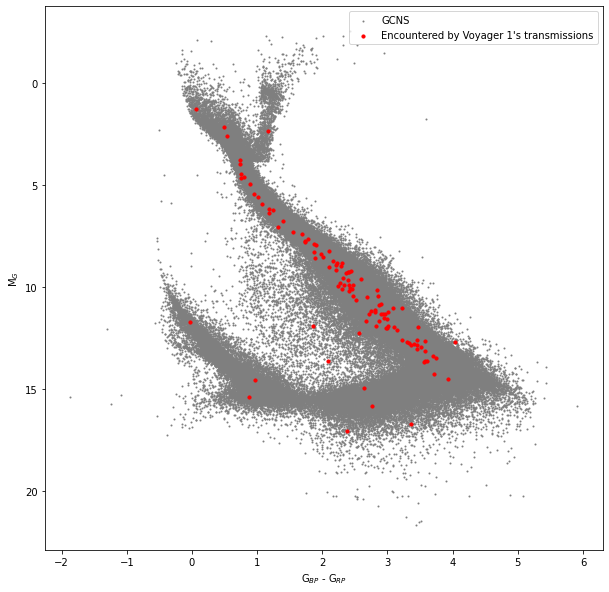

<Figure size 432x288 with 0 Axes>

In [4]:
gcns = pd.read_csv('gcns_total.csv') #all stars in the GCNS database

plt.figure(figsize=(10, 10))

plt.scatter(gcns['bp_rp'], gcns['g_abs'], c = 'tab:gray', s = 1, label = "GCNS")
plt.scatter(voy1_stars['bp_rp'], voy1_stars['g_abs'], c = 'r', s = 10, label = "Encountered by Voyager 1's transmissions")

plt.gca().invert_yaxis()
#plt.title("Color Magnitude Diagram of Stars in GCNS")
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.legend(loc='upper right')

plt.savefig("voy1_superset_hr.png")
plt.show()
plt.savefig("voy1_superset_hr.png")